<a href="https://colab.research.google.com/github/Dorra2021/KNN_classifier_Corona/blob/main/ML_corona_F_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##chargement des données

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import datetime as datetime

os.chdir('/content/drive/My Drive/')


In [193]:
os.chdir('/content/drive/My Drive/ML')

In [194]:
df = pd.read_csv('data_corona.csv')

In [195]:
df.shape #569 lignes, 33 colonnes

(569, 33)

In [196]:
df.head()

,id,diagnostic_corona,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,...,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [197]:
print(df.columns)

Index(['id', 'diagnostic_corona', 'moy_respi', 'moy_texture', 'moy_peri',
       'moy_zone', 'moy_grain', 'moy_compact', 'moy_forme', 'moy_points',
       'moy_fievre', 'moyenne_fract', 'se_respi', 'se_textu', 'se_peri',
       'se_zone', 'se_grain', 'se_compact', 'se_forme', 'se_points',
       'se_fievre', 'se_fract', 'pe_respi', 'pe_textu', 'pe_peri', 'pe_zone',
       'pe_grain', 'pe_compact', 'pe_forme', 'pe_points', 'pe_fievre',
       'pe_fract', 'Unnamed: 32'],
      dtype='object')


In [198]:
df.tail()

,id,diagnostic_corona,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,...,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


##nettoyage des données 

In [199]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

1/ charger le fichier 
2/ stat desc / boxplot/ identification de la variable target / etude de correlation 
3/ cleaning 
4/ utilisation de standard scaler
5/ Applcation les KNN


In [200]:
df.describe()

,id,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


D: notre variable target est 'Diagnostic_corona"

la bonne pratique c'est de mettre l'id en index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3fbfb8f90>,
      dtype=object)

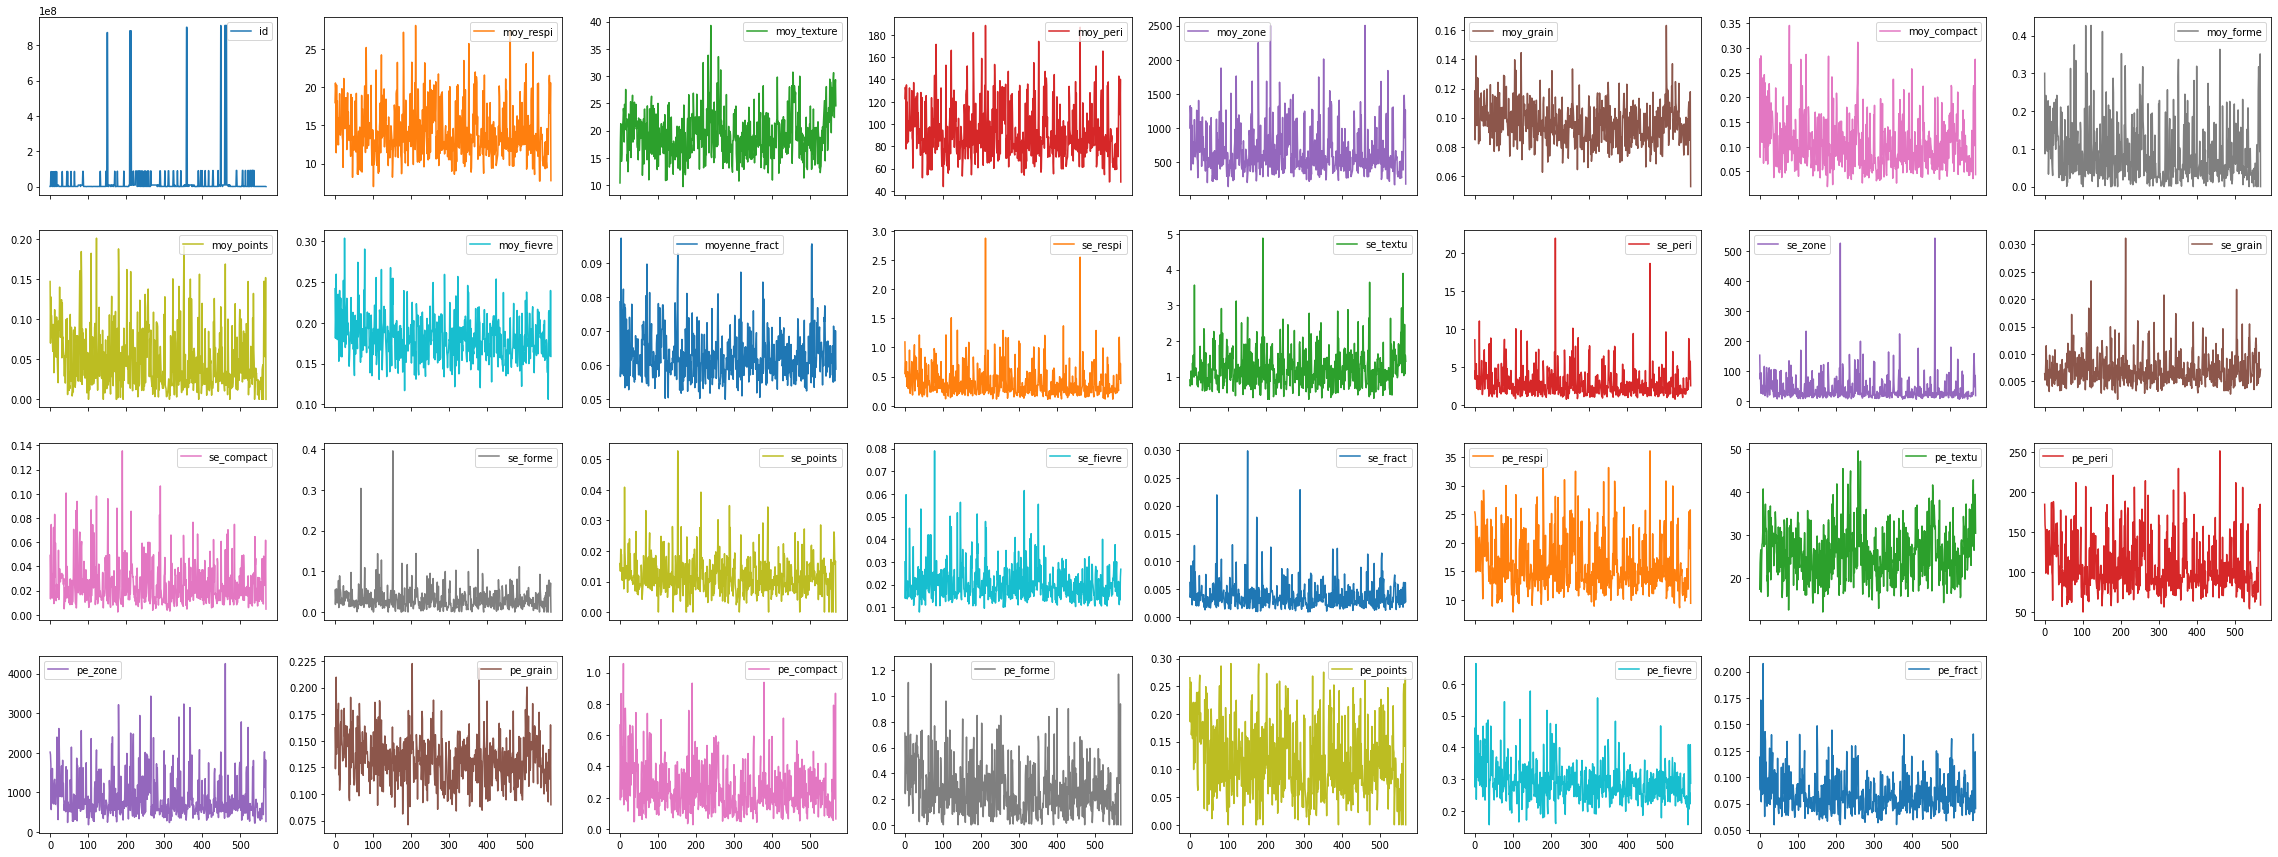

In [201]:
df.plot(subplots=True,layout=(4,8),figsize=(40,15))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

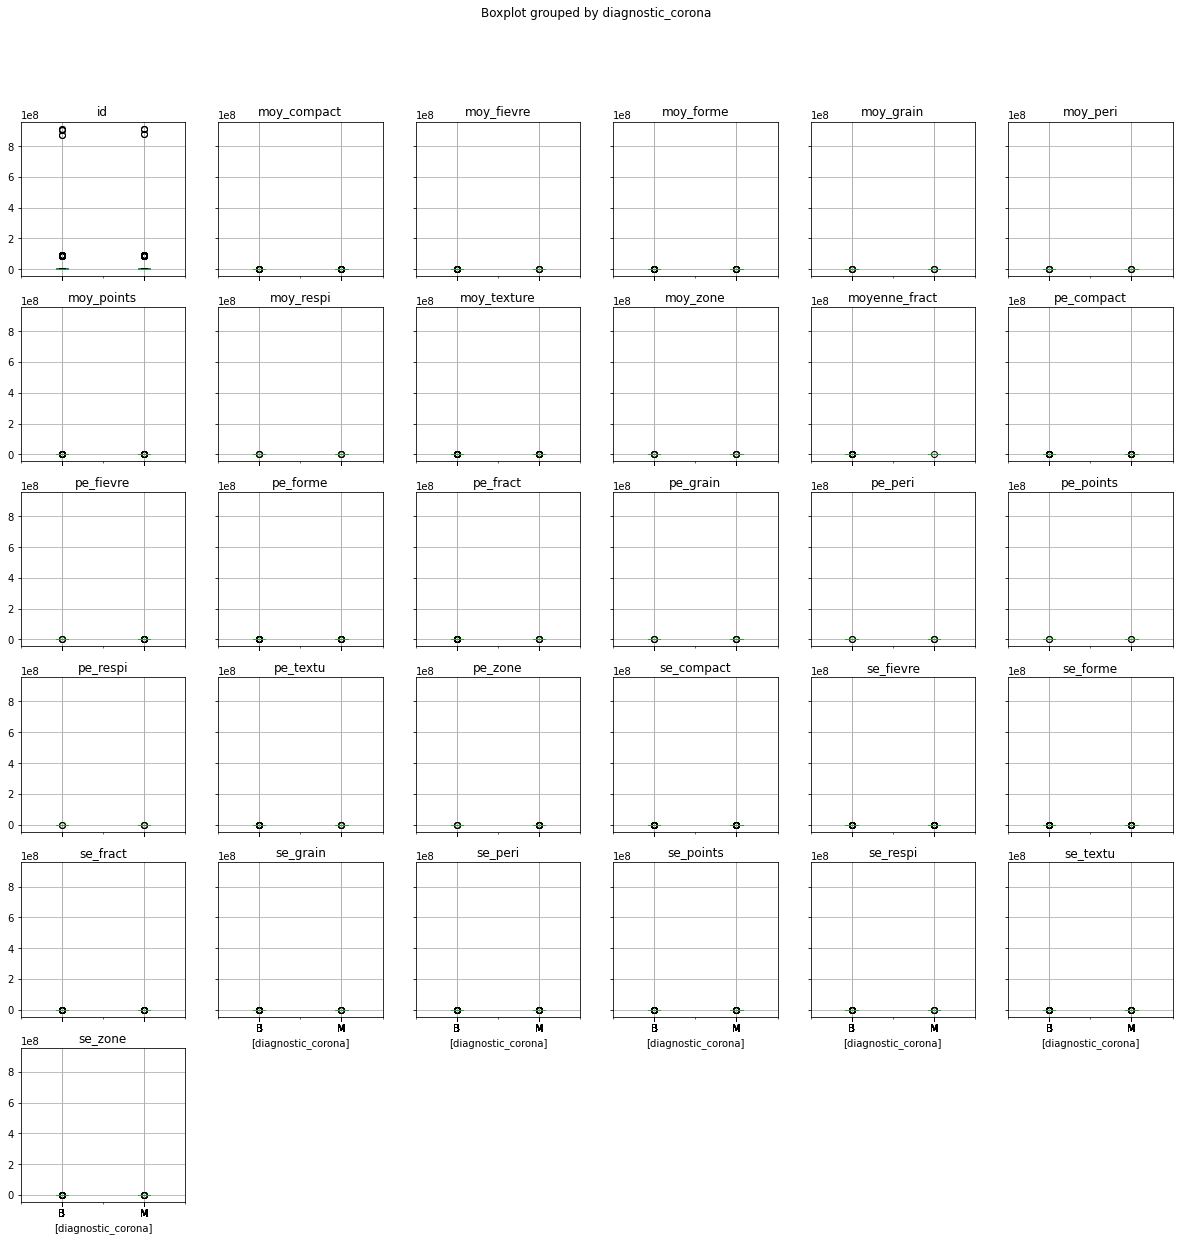

In [202]:
df.boxplot(by = 'diagnostic_corona', figsize = (20, 20))
plt.show()

In [203]:
df['diagnostic_corona'].value_counts()

B    357
M    212
Name: diagnostic_corona, dtype: int64

un modèle de machine learning n'aime pas les mpdèles non equilibrés .
on verra les cas desequilibrés .

In [204]:
df

,id,diagnostic_corona,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [205]:
df.corr()

,id,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
moy_respi,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
moy_texture,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
moy_peri,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
moy_zone,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
moy_grain,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
moy_compact,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
moy_forme,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
moy_points,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
moy_fievre,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [206]:
df.set_index('id',inplace = True)

##matrice de corrélation

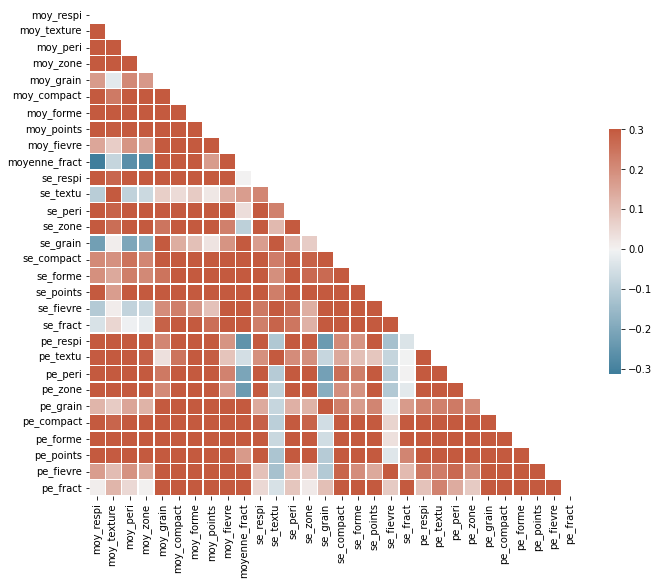

In [207]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split

In [209]:
X=df.iloc[:,1:32]
y=df.iloc[:,0:1]

In [210]:
X

,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,moyenne_fract,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [211]:
y

,diagnostic_corona
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M
...,...
926424,M
926682,M
926954,M


doc : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

uniquement sur les données de train

In [213]:
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)

x_test_scaled = scaler.transform(X_test)

In [214]:
x_test_scaled

array([[-0.47941728, -0.14437517, -0.45730213, ..., -0.19534853,
         0.1991247 ,  0.22458893],
       [ 1.32793534,  0.4946646 ,  1.27076274, ...,  0.99793792,
        -0.53277775, -0.99944294],
       [ 0.35581987,  0.0631359 ,  0.38051055, ...,  0.57396664,
        -0.08067386, -0.1894635 ],
       ...,
       [-0.13303131,  0.38147674, -0.08697347, ...,  0.63871862,
         0.48682717,  1.78790589],
       [ 0.07926977,  1.36243816,  0.14107743, ...,  0.09757709,
         0.47260013,  1.06288932],
       [-0.18051971, -1.14420123, -0.19835663, ...,  0.22553933,
         0.14063573, -0.61994209]])

In [215]:
pd.DataFrame(x_test_scaled,columns=X_test.columns.tolist()) #mettre les données de scaller dans un dataframe avec le libellé des colonnes de X_test

,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,moyenne_fract,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
0,-0.479417,-0.144375,-0.457302,-0.494063,0.261938,0.041693,-0.113434,-0.277994,0.443830,0.146854,...,-0.274952,-0.151136,-0.341656,-0.358623,0.467353,-0.077559,-0.014474,-0.195349,0.199125,0.224589
1,1.327935,0.494665,1.270763,1.286299,-0.431061,-0.014456,0.240731,0.803392,-0.821904,-1.109616,...,1.759956,0.170167,1.741659,1.693609,-0.539562,-0.105462,-0.006441,0.997938,-0.532778,-0.999443
2,0.355820,0.063136,0.380511,0.239399,0.954213,0.361156,0.729846,0.839002,0.465971,-0.648084,...,0.607733,0.074108,0.518811,0.467210,0.985935,-0.066930,0.547787,0.573967,-0.080674,-0.189464
3,-0.498971,-0.361319,-0.441855,-0.532796,0.678753,0.541217,-0.146887,-0.545591,0.023148,1.151204,...,-0.704978,-0.437660,-0.533733,-0.638622,0.571069,0.089190,-0.149014,-0.623945,-0.524874,0.569538
4,-0.739207,-1.125337,-0.719093,-0.711079,0.275711,0.161733,-0.274107,-0.599268,0.048980,0.710337,...,-0.832546,-0.972614,-0.856743,-0.738806,0.117309,-0.250288,-0.453237,-0.693630,-0.883712,-0.124325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.537393,-0.274070,0.518723,0.415485,0.085064,0.194648,0.069287,0.277623,0.207658,-0.025359,...,0.743531,-0.046795,0.641096,0.600214,-0.016658,-0.171896,0.051291,0.114536,-0.151809,-0.110731
184,1.202231,-0.399048,1.177266,1.115982,0.374297,0.543153,0.761525,1.125975,0.100642,0.593232,...,1.325815,-0.442628,1.160060,1.234142,0.406851,0.394788,0.418266,0.803682,-0.597590,0.618250
185,-0.133031,0.381477,-0.086973,-0.230346,1.657361,1.178207,0.059023,0.288621,1.443870,1.632024,...,0.155074,0.428535,0.092306,0.019834,1.452659,0.788743,-0.010959,0.638719,0.486827,1.787906
186,0.079270,1.362438,0.141077,-0.014703,-0.555743,0.374709,0.150764,-0.259928,0.248250,0.102768,...,-0.017760,1.023113,0.178800,-0.132343,0.095702,1.134201,0.672789,0.097577,0.472600,1.062889


##KNN : algo de classification supervisé 

doc : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

In [216]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [217]:
 y_pred=neigh.predict(x_test_scaled)

In [218]:
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B

In [219]:
X_scaled = scaler.transform(X_train)

In [220]:
neigh.classes_

array(['B', 'M'], dtype=object)

##model evaluation  ( Confusion Matrix)

doc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 

In [221]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[117,   4],
       [  4,  63]])

graphique de la matrice de confusion

<function matplotlib.pyplot.show>

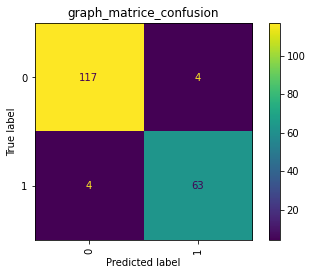

In [222]:
from sklearn.metrics import ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('graph_matrice_confusion')
plt.show

accuracy: le pourcentage des bonnes prédictions
Le nombre des TP (117)est important par rapport à FP donc le modèle arrive à bien prédire les personnes qui sont vraiment malades.
Aussi le modèle arrive à bien prédire TN (les personnes qui sont vraiment pas malades)

In [223]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred) #clacul de l'accuracy 
#y_tue, y_predict

0.9574468085106383

##Confusion Matrix after KNN for different K

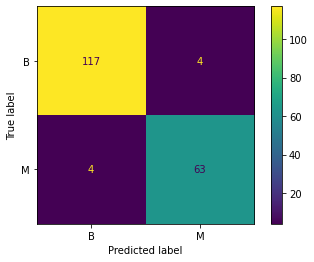

In [224]:
pred_test = neigh.predict(x_test_scaled) # make prediction ( c'est la mm que y_pred )
# Confusion metrix
cm = confusion_matrix(y_test, pred_test, labels= neigh.classes_)
disp =  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()#xticks_rotation='vertical'
plt.show()


In [225]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



POUR AVOIR DES MATRICE DIFFERENTS SELON DIFFERENTES K 


	 evaluation du modèle KNN pour k = 1



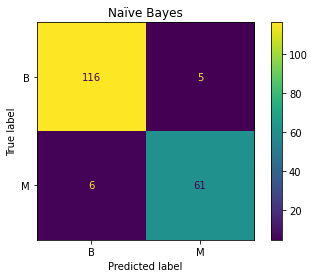

------------


#############
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

##################################################################################################################################

	 evaluation du modèle KNN pour k = 2



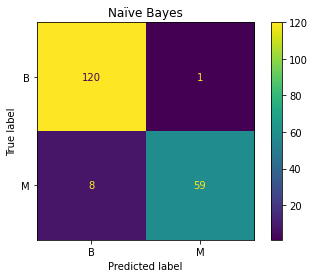

------------


#############
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

##################################################################################################################################

	 evaluation du modèle KNN pour k = 3



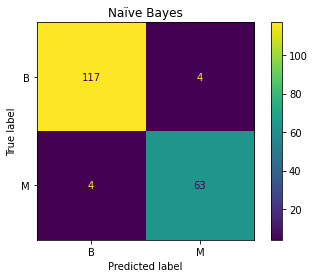

------------


#############
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

##################################################################################################################################

	 evaluation du modèle KNN pour k = 4



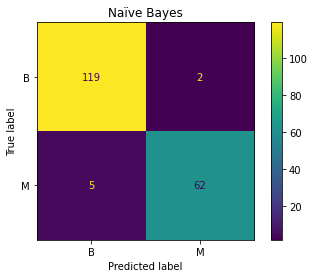

------------


#############
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

##################################################################################################################################

	 evaluation du modèle KNN pour k = 5



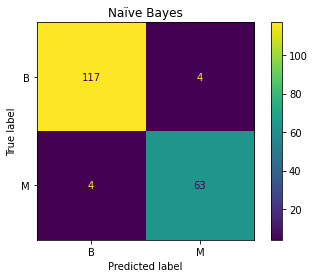

------------


#############
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

##################################################################################################################################

	 evaluation du modèle KNN pour k = 6



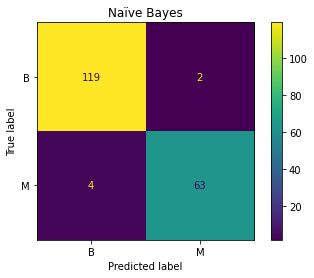

------------


#############
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

##################################################################################################################################

	 evaluation du modèle KNN pour k = 7



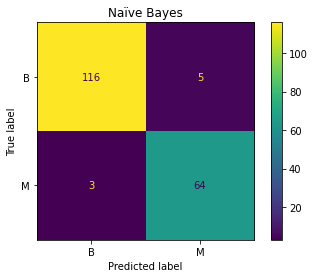

------------


#############
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

##################################################################################################################################

	 evaluation du modèle KNN pour k = 8



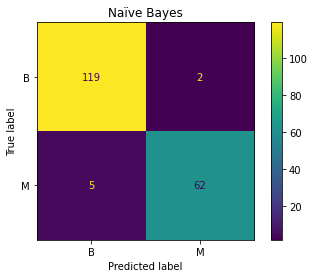

------------


#############
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

##################################################################################################################################

	 evaluation du modèle KNN pour k = 9



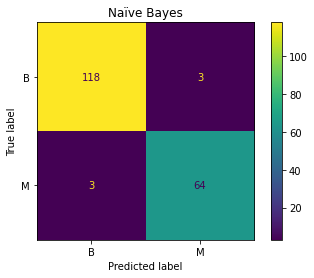

------------


#############
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       121
           M       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

##################################################################################################################################


In [226]:
models_list = []
for i in range(1,10):
  print(f"\n\t evaluation du modèle KNN pour k = {i}\n")
  model = KNeighborsClassifier(n_neighbors=i) # le 5 est pris au hasard # ici notre modèle d'évaluation est KNN
  model.fit(x_train_scaled, y_train.values.ravel())
  pred_test = model.predict(x_test_scaled)
  cm = confusion_matrix(y_test, pred_test, labels= model.classes_)
  disp =  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.title('Naïve Bayes')
  plt.show()
  models_list.append(cm)
  
  print("------------")
  print("\n")
  print("#############")
  print(classification_report(y_test,y_pred))
  print("#############"*10)